In [1]:
%run gabriel_lib.py

c:\Users\pastislab\Documents\Gabriel\Codes_python\Traitement_du_signal_Fourier\gabriel_lib.py:89: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [


# Introduction à l'analyse spectrale

Ce document est une introduction à l'analyse spectrale des signaux périodiques. Après avoir expliqué la décomposition d'un signal périodique en somme de fonctions sinusoïdales, on verra comment effectuer l'analyse spectrale d'un signal échantillonné.

## 2. Série de Fourier et spectre d'un signal périodique

On considère un signal périodique, représenté par une fonction d'une variable t réelle à valeurs réelles, de période T et de classe C1 par morceaux.

La fréquence fondamentale du signal est : $$f_1 = \dfrac{1}{T}$$

D'après le théorème de Fourier, cette fonction peut s'écrire comme une somme de sinusoïdes dont les fréquences sont multiples de la fréquence fondamentale. La somme obtenue est la série de Fourier :

$$u(T) = \dfrac{A_0}{2}+\sum_{n}^p A_n\cos\left(n\dfrac{2\pi}{T}+\phi\right)$$

Dans certains cas, la somme peut être stoppée à un rang P fini. Dans d'autres cas, il faut en principe considérer la limite $P\rightarrow \infty$.

Le terme de rang n est appelé l'harmonique de rang n du signal : c'est une sinusoïde de fréquence

$$f_n = nf_1=\dfrac{n}{T}$$

L'harmonique de rang $n$ est d2fini par son amplitude $A_n$ (positive) et son déphasage $\phi_n$.
Le terme constant $A_0/2$ peutêtre vu comme le terme de fréquence nulle, c'est la valeur moyenne du signal:

$$\dfrac{A_0}{2}=\dfrac{1}{T}\int_0^Tu(t)dt$$

Considérons un signal de rang $p=3$ (une comme de 3 cosinus). On dit que le signal comporte trois harmoniques.

(0.0, 2.0, -2.0, 2.0)

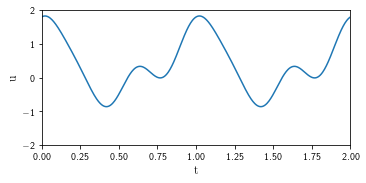

In [12]:
import numpy
import math
import matplotlib.pyplot as plt
f1=1.0
def u(t):
    return 0.4+1.0*numpy.cos(2*numpy.pi*f1*t)\
            +0.5*numpy.cos(2*2*numpy.pi*f1*t-numpy.pi/3)\
            +0.2*numpy.cos(3*2*numpy.pi*f1*t+numpy.pi/4)

N = 500
Tmax = 2.0
Te = Tmax/N
t = numpy.arange(N)*Te
x = u(t)

plt.figure(figsize=set_size(width = 400, subplots = (1,2)))
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('u')
plt.axis([0,2,-2,2])


Le spectre du signal est la représentation graphique de l'amplitude An en fonction de la fréquence. Un signal périodique a en théorie un spectre discret formé de raies, chacune correspondant à un harmonique. Pour cet exemple, il y a 4 raies : une pour la valeur moyenne (fréquence nulle) et 3 raies pour les harmoniques de rang 1, 2 et 3 :

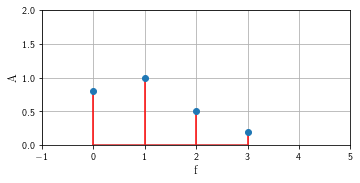

In [13]:
plt.figure(figsize=set_size(width = 400, subplots = (1,2)))
plt.stem([0,1,2,3],[0.8,1.0,0.5,0.2],'r')
plt.xlabel('f')
plt.ylabel('A')
plt.axis([-1,5,0,2])
plt.grid()

La raie de fréquence nulle a une amplitude égale au double de la valeur moyenne du signal (la composante continue). 

la première courbe ($u$ en fonction de $t$) est la représentation emporelle du signal. le spectre est la représentation fréquentielle du signal. En principe, il faudrait aussi tracer la phase $\phi_n$ pour avoir une représentation complète. Pour les calculs, il est commode d'introduire la série de Fourier sous forme complexe: 

$$u(t) = \sum_{n=p}^p c_n {\rm e}^{in\dfrac{2\pi}{T}t}$$

Le coefficient $c_n$ est un nombre complexe appelé coefficient de Fourier. Il se calcule à partir de la fonction $u$ avec l'intégrale suivante: 

$$c_n = \dfrac{1}{T}\int_0^T u(t){\rm e}^{-in\dfrac{2\pi}{T}t}$$

Puisque $u(t)$ est réel, le coefficient de Fourier vérifie la propriété suivante : 

$$c_n = c^*_{-n}$$ 

L'étoile désigne le complexe conjugué. La somme s'écrit donc: 

$$u(t) = c_0+\sum_{n=1}^p c_n{\rm e}^{in\dfrac{2\pi}{T}t} + c_{-n}{\rm e}^{-in\dfrac{2\pi}{T}t}$$


$$u(t) = c_0 + \sum_{n=1}^p 2Re\left[c_n{\rm e}^{in\dfrac{2\pi}{T}t}\right]$$

On en déduit que $c_0=\dfrac{A_0}{2}$ et $c_n = \dfrac{A_n}{2}{\rm e}^{i\phi_n}$

# Transformée de Fourier discrète du signal

C'est la transformation qui permet de calculer le spectre d'un signal dscret, obtenu par échantillonage d'un signal continu. Considérons un échantillonage de la fonction $u$ sur l'intervalle $[0,T]$, comportant $N$ points et défini par : 

$$t_k = k \dfrac{T}{N}~~(0<k<N-1)$$
$$u_k = u(t_k)$$

On définit la période d'échantillonage et la fréquence d'échantillonage par: 

$$Te = \dfrac{T}{N}$$
$$fe = \dfrac{1}{Te}$$

Une valeur approchée de l'intégrae définissant les coefficients de Fourier peut être obtenue par la méthode des rectangles: 

$$c_n = \dfrac{1}{T}\sum_{k=0}^{N-1} \dfrac{T}{N} u_k {\rm e}^{-i\dfrac{2\pi nk}{N}}$$

par définition, la transformée de Fourier discrète est l'application qui aux $N$ nombres $u_k$ associe les $N$ nombres complexes suivants $(0<n<N-1)$

$$\tilde{U}_n = \dfrac{1}{N}\sum_{k=0}^{N-1} u_k {\rm e}^{-i\dfrac{2\pi nk}{N}}$$

la transformée de Fourier discrète est calculée numériquement avec l'algorithme dit de Transformée de Fourier rapide, désignée souvent par fft.



Text(0, 0.5, 'u')

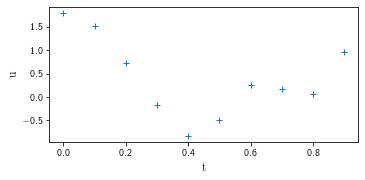

In [40]:
N = 10
Tmax = 1.0
Te = Tmax/N
t = numpy.arange(0,N)*Te
x=u(t)
plt.figure(figsize=set_size(width = 400, subplots = (1,2)))
plt.plot(t,x, '+')
plt.xlabel('t')
plt.ylabel('u')
   

Text(0, 0.5, '|cn|')

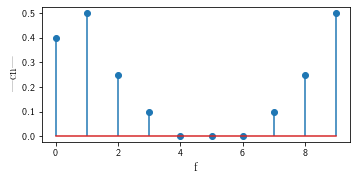

In [41]:
import numpy.fft

tfd = numpy.fft.fft(x)

plt.figure(figsize=set_size(width = 400, subplots = (1,2)))
f=numpy.arange(0,N,1)


plt.stem(f,numpy.absolute(tfd)/N) 
plt.xlabel("f")
plt.ylabel("|cn|")
# plt.axis([-1,11,0,1])


Les 4 premières valeurs de la TFD donnent bien les coefficients de Fourier de rang 0 à 3. Les éléments d'indice 4,5 et 6 sont nulles, aux erreurs d'arrondis près (erreurs de l'ordre de 1e-16). Les trois derniers éléments (indices 7 à 9) sont les conjugués des trois coefficients c1, c2 et c3; ils ont donc le même module. Le terme d'indice 1 est conjugué du terme d'indice 9, celui d'indice 2 conjugué du terme d'indice 8, etc. La fréquence centrale du spectre est égale à la moitié de la fréquence d'échantillonnage; c'est la fréquence de Nyquist. Ici, la fréquence de Nyquist est fn=5. Comme la condition de Nyquist-Shannon est respectée, cette fréquence est supérieure à P=3. La partie du spectre située à gauche de cette fréquence est le spectre du signal continu u(t). La totalité du spectre est celui du signal discret. La partie située à droite de la fréquence de Nyquist est l'image de la partie gauche (à l'exclusion de la composante de fréquence nulle). On voit que la condition de Nyquist-Shannon se traduit par le non chevauchement du spectre et de son image.

En fait, le spectre du signal discret est périodique, de période égale à la fréquence d'échantillonnage. La relation définissant la TFD vérifie en effet la relation :

$$\tilde{U}_{N+n}=\tilde{U}_n$$

La TFD que nous avons calculée donne donc les valeurs de ce spectre sur une période. Cependant, ce qui nous intéresse en pratique est plutôt le spectre du signal continu u(t), qui est donné par la première moitié de la TFD.

En pratique, on s'intéresse aux amplitudes An des harmoniques plutôt qu'aux valeurs des coefficients de Fourier cn. Il faut alors multiplier les coefficient par deux :

(-1.0, 11.0, 0.0, 1.2)

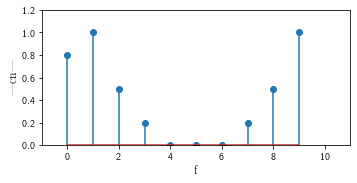

In [42]:
plt.figure(figsize=set_size(width = 400, subplots = (1,2)))
f=numpy.arange(0,N,1)
plt.stem(f,numpy.absolute(tfd)*2/N) 
plt.xlabel("f")
plt.ylabel("|cn|")
plt.axis([-1,11,0,1.2])


$\underline{\rm À~noter: }$ 

On remarque que la composante de fréquence nulle du spectre a une amplitude égale au double de la valeur moyenne. Dans le cas présent, on pourrait facilement diviser le terme d'indice 0 par deux pour obtenir directement la composante de fréquence nulle du signal, mais cette méthode n'est pas toujours applicable sur les spectres expérimentaux. 

# Transformée de Fourier inverse

L'information présente dans le signal échantillonné est entièrement contenue dans sa TFD. On peut en effet calculer le signal à partir de sa TFD par la relation suivante :

$$ U_k = \dfrac{1}{N}\sum_{n=0}^{N-1} \tilde{U}_n {\rm e}^{i\dfrac{2\pi nk}{N}}$$


La transformation qui permet ainsi de retrouver le signal discret est la transformation de Fourier discrète inverse. Elle ressemble beaucoup à la TFD directe : on remarque le changement de signe dans l'exponentielle et l'absence du facteur 1/N. En ce qui concerne ce facteur, il existe d'ailleurs différentes conventions pour la définition de la TFD.

Comme exemple, calculons la TFD inverse de la TFD obtenue précédemment :

C:\Users\pastislab\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

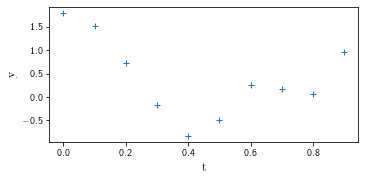

In [46]:
y = numpy.fft.ifft(tfd)

plt.figure(figsize=set_size(width = 400, subplots = (1,2)))
plt.plot(t,y, '+')
plt.xlabel('t')
plt.ylabel('y')


On retrouve le signal de départ !

# Analyse spectrale

Un signal périodique 